In [ ]:
import re
import spacy
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from gensim.models import KeyedVectors
import gensim.downloader as api
from nltk.stem import WordNetLemmatizer
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
## 1. Logistic Regression
from sklearn.linear_model import LogisticRegression
## 2. Support Vector Machine
from sklearn.svm import SVC
## 3. Feed forward neural network or multi-layered perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
# compute "goodness" of classification through accuracy
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cosine
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv('data (1).csv')
with open('positive-words (1).txt', 'r') as file:
    # Read the lines and strip whitespace (including newline characters)
    positive_words = set([line.strip() for line in file])

with open('negative-words (1).txt', 'r') as file:
    # Read the lines and strip whitespace (including newline characters)
    negative_words = set([line.strip() for line in file])

# Print the list of words
print(positive_words)
print(negative_words)
print(df.shape)

{'fruitful', 'mind-blowing', 'gratified', 'effectual', 'extraordinary', 'visionary', 'lionhearted', 'uphold', 'supurb', 'simplify', 'openness', 'triumphant', 'expansive', 'solicitous', 'prowess', 'chivalrous', 'unconditional', 'thrifty', 'self-satisfaction', 'razor-sharp', 'enticed', 'wonderously', 'excitingly', 'ingeniously', 'versatile', 'dumbfounded', 'gracious', 'gooood', 'innovative', 'effusiveness', 'passionately', 'woo', 'portable', 'prominent', 'dashing', 'light-hearted', 'phenomenal', 'talents', 'graceful', 'enrapture', 'exceptional', 'comely', 'excitement', 'merciful', 'galore', 'relaxed', 'refine', 'dauntless', 'daringly', 'fortune', 'exquisitely', 'cleanliness', 'humane', 'enjoyably', 'proper', 'pamperedness', 'enthusiastically', 'fabulously', 'pleases', 'impassioned', 'sparkling', 'unforgettable', 'speedy', 'empowerment', 'golden', 'fervidly', 'meticulously', 'interests', 'effectiveness', 'felicitous', 'assuredly', 'sensational', 'perfectly', 'well-informed', 'tempt', 'mes

List of positive and negative words.

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:

words = list(positive_words.union(negative_words))

# Create TfidfVectorizer with custom vocabulary
vectorizer = TfidfVectorizer(vocabulary=words, lowercase=True)

# Fit the vectorizer on an empty list to set up the vocabulary

# Function to calculate sentiment score for a headline
def calculate_sentiment_score(headline):
    tokens = word_tokenize(headline.lower())
    token_tfidf = vectorizer.fit_transform([' '.join(tokens)]).toarray()[0]
    positive_tfidf = sum(token_tfidf[:len(positive_words)])
    negative_tfidf = sum(token_tfidf[len(positive_words):])
    if positive_tfidf >= negative_tfidf:
        return 'positive'
    else:
        return 'negative'

# Apply sentiment analysis to each headline
df['sentiment'] = df['cleaned title'].apply(calculate_sentiment_score)

Function to calculate sentiment scores for each headline.

In [ ]:
df.head(20)

,Unnamed: 0,Date,category,title,content,Volume,label,sentiment,cleaned title
0,0,2020-01-27,opinion,Apple Set To Beat Q1 Earnings Estimates Tech ...,Technology giant Apple NASDAQ AAPL is set ...,161940000,0,positive,apple set beat q1 earnings estimate tech etf buy
1,1,2020-01-27,opinion,Tech Daily Intel Results Netflix Surge Appl...,The top stories in this digest are Intel s N...,161940000,0,positive,tech daily intel result netflix surge apple va...
2,2,2020-01-27,opinion,7 Monster Stock Market Predictions For The Wee...,S P 500 SPY \nThis week will be packed with e...,161940000,0,negative,7 monster stock market prediction week january 27
3,3,2020-01-27,opinion,Apple Earnings Preview 5G Launch Expanding S...,Reports Q1 2020 results on Tuesday Jan 28 ...,161940000,0,positive,apple earnings preview 5g launch expanding ser...
4,4,2020-01-27,opinion,Buy Surging Apple Microsoft Stock Before Qua...,On today s episode of Full Court Finance here ...,161940000,0,positive,buy surging apple microsoft stock quarterly ea...
5,5,2020-01-27,opinion,Top Stock Analyst Reports For Merck Broadcom ...,Monday January 27 2020The Zacks Research Dai...,161940000,0,negative,top stock analyst report merck broadcom sanofi
6,6,2020-01-27,news,Stocks Europe Seen Opening Lower as Virus Co...,By Peter Nurse \nInvesting com European stoc...,161940000,0,negative,stock europe seen opening lower virus concern ...
7,7,2020-01-27,news,Intelligent Systems wins bullish rating from B...,BTIG analyst Mark Palmer initiates coverage of...,161940000,0,negative,intelligent system win bullish rating btig app...
8,8,2020-01-24,opinion,What To Do If A Stock On Your Buy List Has A...,I got a great question recently from Barbara P...,146537600,0,positive,stock buy list already run 100
9,9,2020-01-24,opinion,Previewing Tech Sector Earnings,We get into the heart of the Q4 earnings seaso...,146537600,0,positive,previewing tech sector earnings


In [ ]:
df['sentiment'].value_counts()

sentiment
positive    10450
negative     5525
Name: count, dtype: int64

In [ ]:
columns = df.columns
print(columns)

Index(['Unnamed: 0', 'Date', 'category', 'title', 'content', 'Volume', 'label',
       'sentiment', 'cleaned title'],
      dtype='object')


In [ ]:
encoded_df = pd.DataFrame()
encoded_df['category'] = df['category'].apply(lambda x: 1 if x == 'news' else 0)
encoded_df['volume'] = df['Volume']
df['Date'] = pd.to_datetime(df['Date'])
encoded_df['year'] = df['Date'].dt.year
encoded_df['month'] = df['Date'].dt.month
encoded_df['day'] = df['Date'].dt.day
encoded_df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)
encoded_df['label'] = df['label']

One-hot encoding to create numerical values

In [ ]:
encoded_df.head()

,category,volume,year,month,day,sentiment,label
0,0,161940000,2020,1,27,1,0
1,0,161940000,2020,1,27,1,0
2,0,161940000,2020,1,27,0,0
3,0,161940000,2020,1,27,1,0
4,0,161940000,2020,1,27,1,0


Encoded df

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
encoded_df.dropna(inplace=True)


X = encoded_df[['category', 'volume','year', 'month', 'day', 'sentiment']]  # Features
y = encoded_df['label']                                # Target variable

# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)

In [ ]:
from sklearn.impute import SimpleImputer


# Initialize and fit Logistic Regression classifier
classifier_lr = LogisticRegression(max_iter=10000000)
classifier_lr.fit(X_train, y_train)

# Predict on test data
y_pred = classifier_lr.predict(X_test)

# Calculate accuracy of the model
accuracy_lr = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression = {accuracy_lr*100}%")

Accuracy of Logistic Regression = 55.305164319248824%


In [ ]:
# SVC

classifier_svc = SVC(max_iter=1000)

classifier_svc.fit(X_train, y_train)

y_pred = classifier_svc.predict(X_test)

accuracy_svc = accuracy_score(y_test,y_pred)
print(f"Accuracy of Support Vector Classification = {accuracy_svc*100}%")


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy of Support Vector Classification = 55.89984350547731%


In [ ]:
# Feed Forward Network

classifier_ffn = MLPClassifier(max_iter=1000)

classifier_ffn.fit(X_train,y_train)

y_pred = classifier_ffn.predict(X_test)

# Calculate the accuracy of model
accuracy_ffn =ffn = accuracy_score(y_test, y_pred)
print(f"Accuracy of Feed Forward Network = {accuracy_ffn*100}%")

Accuracy of Feed Forward Network = 44.69483568075117%


These three models were pretty bad, so we switched to decision trees.

In [ ]:
# random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


# Create a Random Forest Classifier
classifier_rf = RandomForestClassifier()

# Fit the model on the training data
classifier_rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier_rf.predict(X_test)

# Calculate the accuracy of the model
accuracy_rf = accuracy_score(y_test, y_pred)
print(f"Accuracy of Random Forest Classifier = {accuracy_rf*100}%")
# Generate the classification report
report_rf = classification_report(y_test, y_pred)
print("Classification Report for Random Forest Classifier:")
print(report_rf)


Accuracy of Random Forest Classifier = 97.90297339593114%
Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1428
           1       0.98      0.99      0.98      1767

    accuracy                           0.98      3195
   macro avg       0.98      0.98      0.98      3195
weighted avg       0.98      0.98      0.98      3195



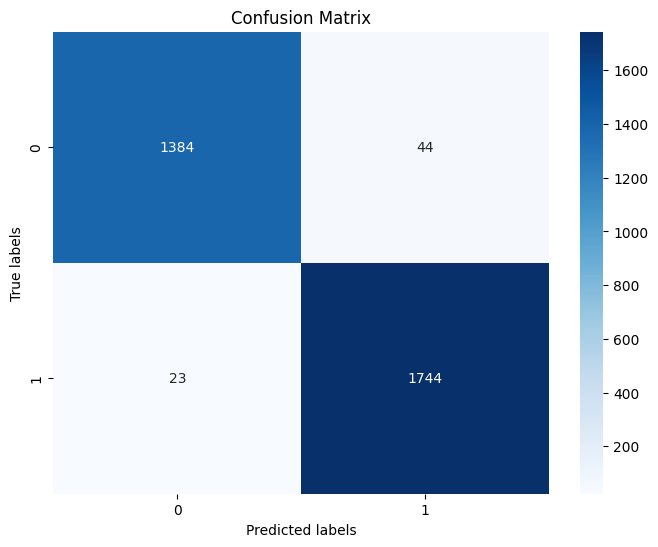

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming y_true and y_pred are your true and predicted labels
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.9730185497470489
Recall: 0.9796264855687606
F1 Score: 0.9763113367174281


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Create an XGBoost Classifier
classifier_xgb = XGBClassifier()

# Fit the model on the training data
classifier_xgb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier_xgb.predict(X_test)

# Calculate the accuracy of the model
accuracy_xgb = accuracy_score(y_test, y_pred)
print(f"Accuracy of XGBoost Classifier = {accuracy_xgb*100}%")
# Generate the classification report
report_rf = classification_report(y_test, y_pred)
print("Classification Report for Random Forest Classifier:")
print(report_rf)

Accuracy of XGBoost Classifier = 97.37089201877934%
Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1428
           1       0.97      0.98      0.98      1767

    accuracy                           0.97      3195
   macro avg       0.97      0.97      0.97      3195
weighted avg       0.97      0.97      0.97      3195



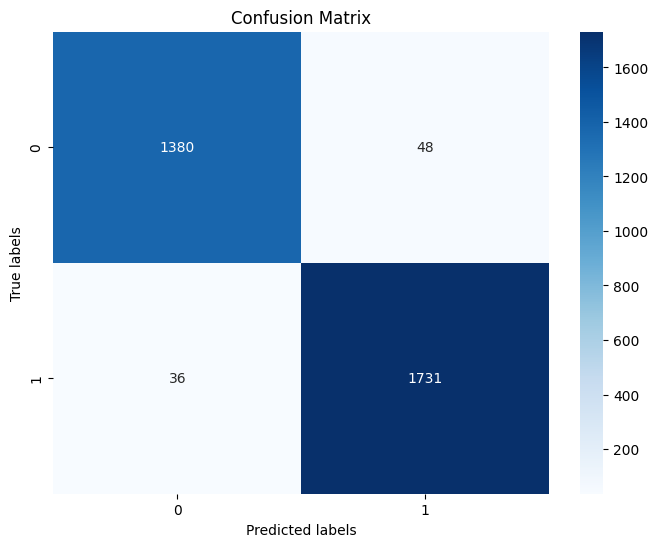

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.9730185497470489
Recall: 0.9796264855687606
F1 Score: 0.9763113367174281


Both random forest and XGBoost were much better at predicting buy and sell signals.

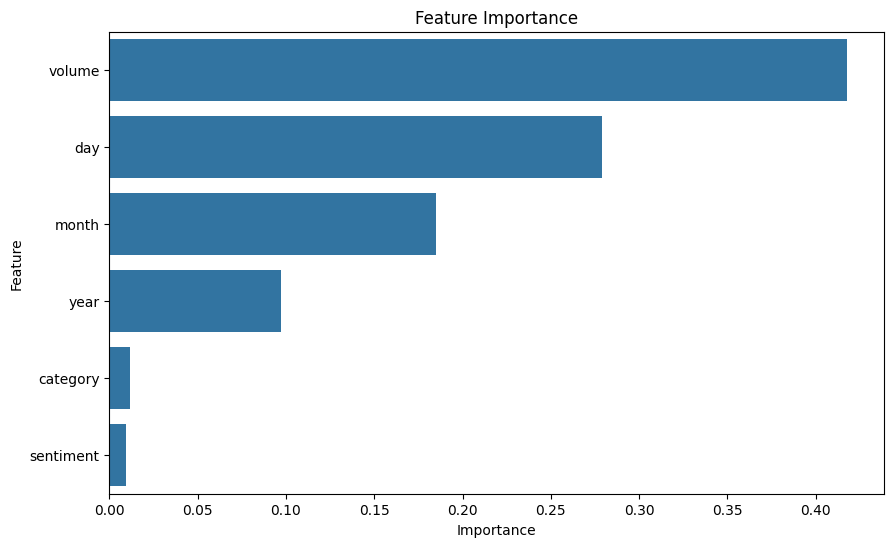

In [ ]:
feature_importance = classifier_rf.feature_importances_
features = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
sorted_feature_importance = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=sorted_feature_importance)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()